In [48]:
%matplotlib inline
import os, sys, time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import matplotlib.gridspec as gridspec
import itertools

In [41]:
w_dir = os.getcwd()
filenames = os.listdir()
print('filenames: \n', filenames)
    

filenames: 
 ['vgg_15_BN_64_con_True_lr_0.001_seed_0_scores.csv', 'plot_tune_scores_individual_model.ipynb', '.ipynb_checkpoints', 'vgg_15_BN_64_con_False_lr_0.001_seed_0_scores.csv', 'vgg_15_BN_64_con_True_lr_0.1_seed_0_scores.csv', 'vgg_15_BN_64_con_True_lr_0.01_seed_0_scores.csv', 'vgg_15_BN_64_con_False_lr_0.01_seed_0_scores.csv', 'task.png', 'vgg_15_BN_64_con_False_lr_0.1_seed_0_scores.csv']


In [65]:
master = {}
def lr_dict(lr):
    for val in [True, False]:
        master[str(val)] = {}
        total = []
        with open('vgg_15_BN_64_con_'+ str(val) + '_lr_' + str(lr) +'_seed_0_scores.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            keys = next(reader)

            for row in reader:
                total.append(np.float_(row))

        print(keys)
        total = np.array(total)
        mins = np.array([np.min(x) for x in total.T])

        print(keys, mins)

        acc_dict = {}
        loss_dict = {}
        for key in keys:

            if 'acc' in key:
                print(key)
                acc_dict[key] = total[:, keys.index(key)]  
            elif 'loss' in key:
                print(key)
                loss_dict[key] = total[:, keys.index(key)]

        master[str(val)]['loss'] = loss_dict
        master[str(val)]['acc'] = acc_dict
        
    return master

['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc']
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h_val_c10_acc', 'v4_loss', 'v4_acc', 'v6_loss', 'v6_acc', 'c10_50k_loss', 'c10_50k_acc'] [ 0.          0.42560561  0.84277778  0.52437175  0.806       0.00154612
  0.845       0.30446508  0.807       0.80499292  0.6848095   0.71814455
  0.6915      0.00213709  0.83036   ]
c10h_train_loss
c10h_train_acc
c10h_val_loss
c10h_val_acc
c10h_train_c10_loss
c10h_train_c10_acc
c10h_val_c10_loss
c10h_val_c10_acc
v4_loss
v4_acc
v6_loss
v6_acc
c10_50k_loss
c10_50k_acc
['epoch', 'c10h_train_loss', 'c10h_train_acc', 'c10h_val_loss', 'c10h_val_acc', 'c10h_train_c10_loss', 'c10h_train_c10_acc', 'c10h_val_c10_loss', 'c10h

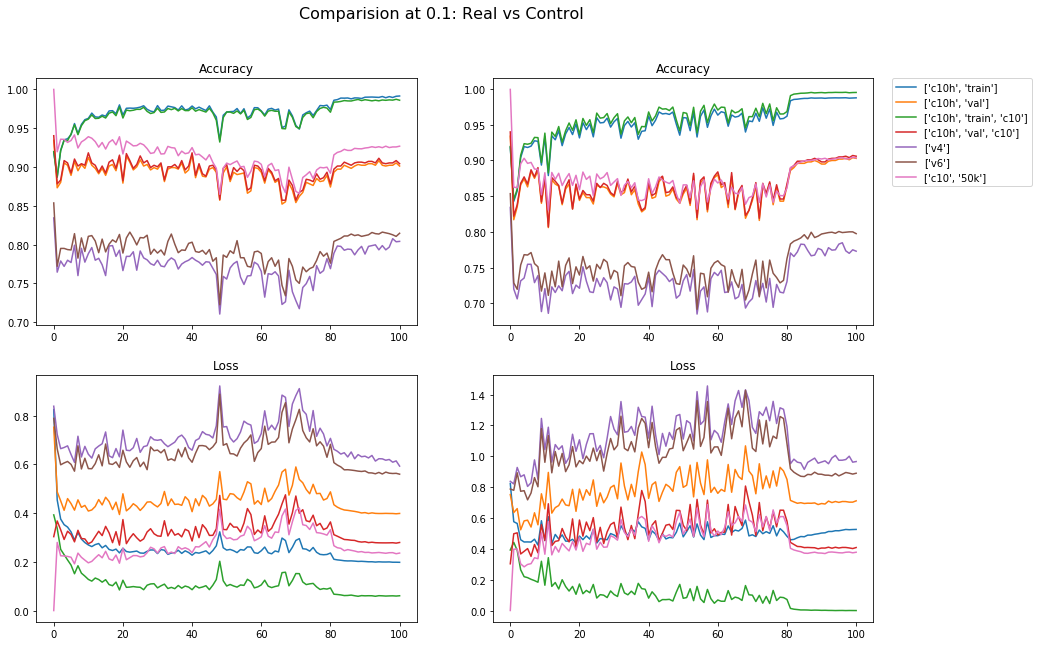

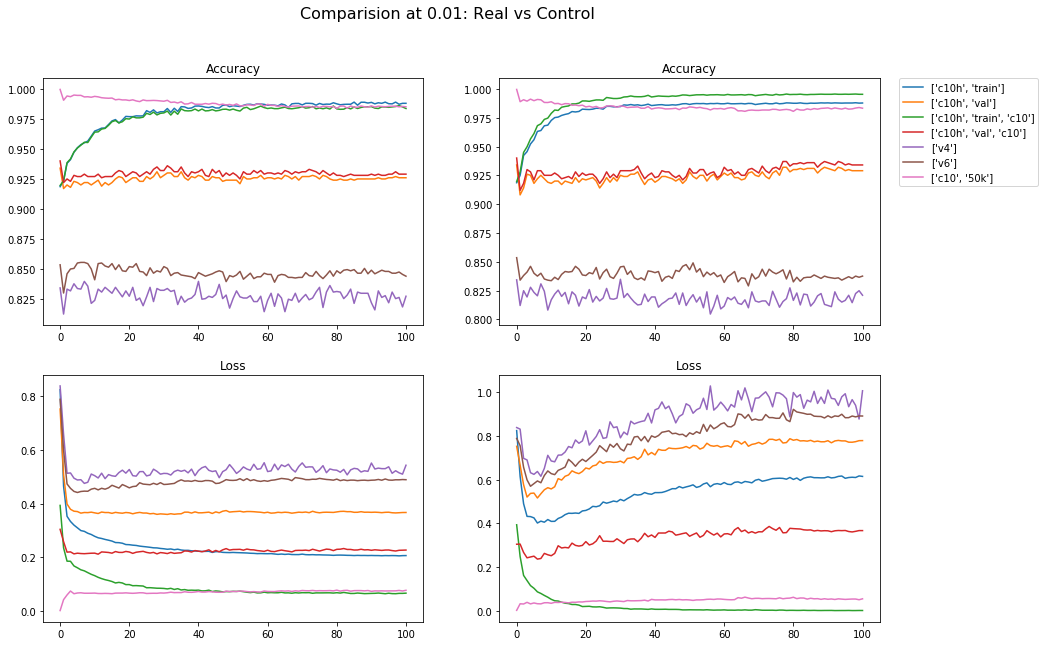

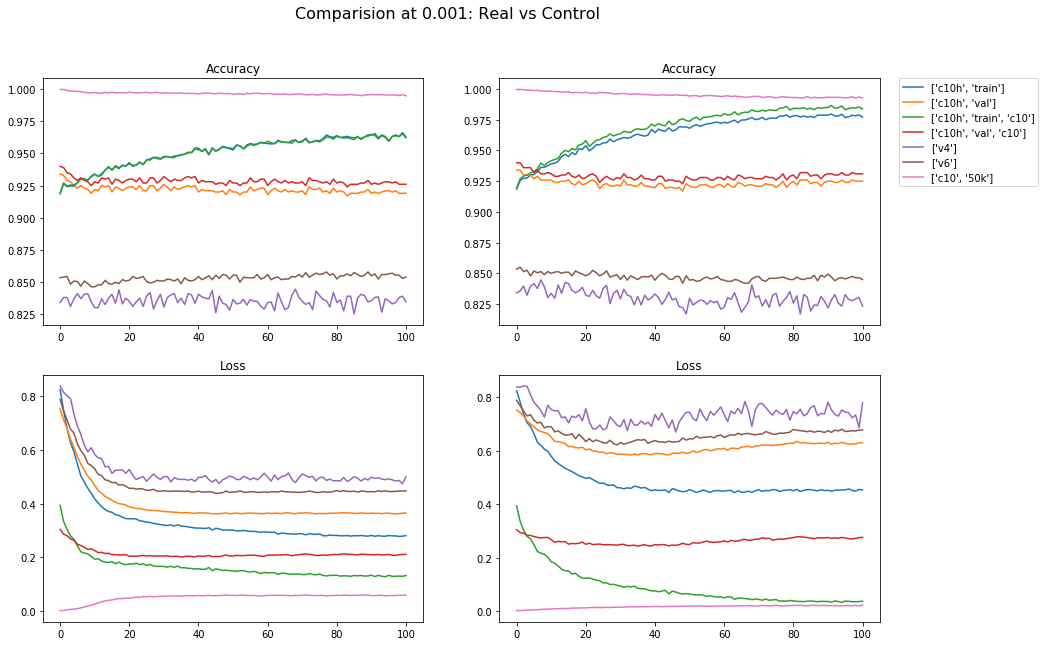

In [72]:
for lr in [0.1, 0.01, 0.001]:
    master = lr_dict(lr)
    
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Comparision at ' + str(lr) + ': Real vs Control', fontsize=16)
    real_dict = master['False']
    control_dict = master['True']

    gs = gridspec.GridSpec(2, 2)

    ax_ul = plt.subplot(gs[0, 0])
    ax_ul.set_title('Accuracy')
    for k, v in real_dict['acc'].items():
        ax_ul.plot(v, label = list(itertools.chain(k.split('_')[:-1])))
    #ax_ul.set_ylim([0, 1])
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax_ll = plt.subplot(gs[1, 0])
    ax_ll.set_title('Loss')
    for k, v in real_dict['loss'].items():
        ax_ll.plot(v, label=k)
    #ax_ll.set_ylim([0, 1])
        
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax_ur = plt.subplot(gs[0, 1], sharex=ax_ul)
    ax_ur.set_title('Accuracy')
    for k, v in control_dict['acc'].items():
        ax_ur.plot(v, label = list(itertools.chain(k.split('_')[:-1])))
    #ax_ur.set_ylim([0, 1])
    ax_ur.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax_lr = plt.subplot(gs[1, 1], sharex=ax_ll)
    ax_lr.set_title('Loss')
    for k, v in control_dict['loss'].items():
        ax_lr.plot(v, label=k)
    #ax_lr.set_ylim([0, 1])
    #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(w_dir + '/comparison_fig_lr_' + str(lr) + '.png')
